In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Preprocess the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# Reshape the data
x_train = np.reshape(x_train, (-1, 28, 28))
x_test = np.reshape(x_test, (-1, 28, 28))


In [5]:
# Define GRU model
gru_model = Sequential([
    GRU(128, input_shape=(28, 28)),
    Dense(10, activation='softmax')
])

gru_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Train GRU model
gru_history = gru_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10


469/469 [==============================] - 31s 49ms/step - loss: 0.5848 - accuracy: 0.8063 - val_loss: 0.1782 - val_accuracy: 0.9468
Epoch 2/10
469/469 [==============================] - 24s 50ms/step - loss: 0.1594 - accuracy: 0.9520 - val_loss: 0.1215 - val_accuracy: 0.9637
Epoch 3/10
469/469 [==============================] - 22s 46ms/step - loss: 0.1078 - accuracy: 0.9669 - val_loss: 0.1003 - val_accuracy: 0.9684
Epoch 4/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0821 - accuracy: 0.9755 - val_loss: 0.0765 - val_accuracy: 0.9777
Epoch 5/10
469/469 [==============================] - 21s 46ms/step - loss: 0.0689 - accuracy: 0.9791 - val_loss: 0.0668 - val_accuracy: 0.9803
Epoch 6/10
469/469 [==============================] - 22s 46ms/step - loss: 0.0557 - accuracy: 0.9833 - val_loss: 0.0558 - val_accuracy: 0.9837
Epoch 7/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0479 - accuracy: 0.9858 - val_loss: 0.0502 - val_accurac

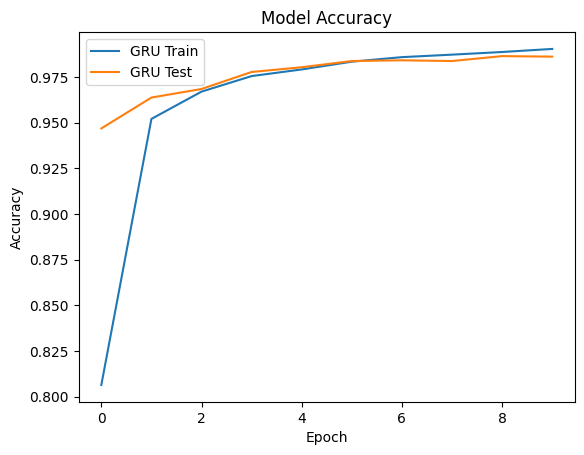

In [7]:
# Plot accuracy
plt.plot(gru_history.history['accuracy'], label='GRU Train')
plt.plot(gru_history.history['val_accuracy'], label='GRU Test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

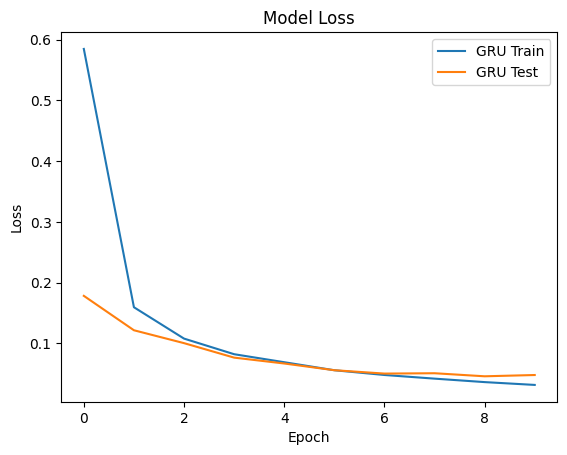

In [8]:
# Plot loss
plt.plot(gru_history.history['loss'], label='GRU Train')
plt.plot(gru_history.history['val_loss'], label='GRU Test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
